In [245]:
import tensorflow as tf # Make sure that python interpreter is 3.9.13 Global env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import ast


In [246]:
ptb = pd.read_csv('C:/Users/varun/ECG_Research_Project/ECG_Model/data/ptbxl_database.csv')
ptb.head()
len(ptb)

21799

In [247]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [248]:
path = 'C:/Users/varun/ECG_Research_Project/ECG_Model/data'
sampling_rate=100

In [249]:
# load and convert annotation data
Y = pd.read_csv(path+'/ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [250]:


# Load raw signal data
X = load_raw_data(Y, sampling_rate, 'C:/Users/varun/ECG_Research_Project/ECG_Model/data/')

In [251]:
temp = pd.DataFrame(X[1])
X.shape, Y.shape

((21799, 1000, 12), (21799, 27))

In [252]:

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'/scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))


# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)


In [253]:
Y_pd = pd.DataFrame(Y)
Y_pd

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]


### Visualizing the Data

Text(0.5, 1.0, 'Distribution of Sex')

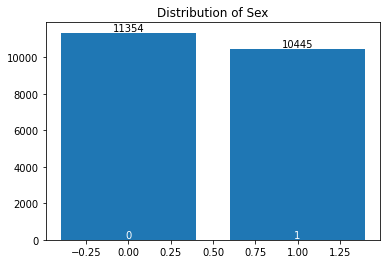

In [254]:
# Distribution of Male and Female ECGs
uniques, counts = np.unique(Y_pd.sex, return_counts=True)
plt.bar(uniques, counts)
for i in range(len(uniques)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
    plt.text(i, i, str(i), ha='center', va='bottom', color = "white")
plt.title("Distribution of Sex")

Text(0.5, 1.0, 'Distribution of Diagnostic Superclasses')

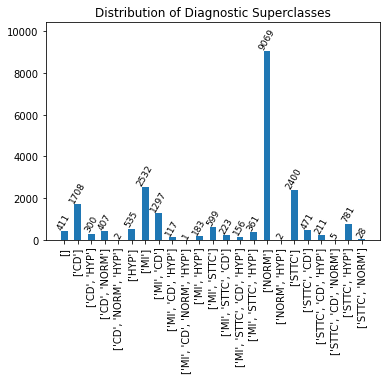

In [255]:
diag_uniques, diag_counts = np.unique(Y_pd.diagnostic_superclass, return_counts=True)
temp = [str(i) for i in diag_uniques]
plt.bar(temp, diag_counts, width = 0.5)
for i in range(len(diag_uniques)):
    plt.text(i, diag_counts[i], str(diag_counts[i]), ha='center', va='bottom', size = 9, rotation = 60)

plt.xticks(rotation = 90)
plt.ylim(0, max(diag_counts) + max(diag_counts)*0.15)
plt.title("Distribution of Diagnostic Superclasses")

### Preprocessing

In [307]:
# Normalization
X_mean = np.mean(X)
X_std = np.std(X)

X_norm = (X-X_mean)/X_std
X_norm.shape

(21799, 1000, 12)

In [351]:

# Split data into train and test
test_fold =10
X_train = X_norm[(Y.strat_fold != test_fold)]
y_train = Y[Y.strat_fold != test_fold].sex

X_test = X_norm[(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].sex

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_test


((19601, 1000, 12),
 (2198, 1000, 12),
 (19601, 2),
 (2198, 2),
             0      1
 ecg_id              
 9        True  False
 38       True  False
 40       True  False
 57       True  False
 59       True  False
 ...       ...    ...
 21809   False   True
 21812    True  False
 21818   False   True
 21819    True  False
 21826   False   True
 
 [2198 rows x 2 columns])

Text(0.5, 1.0, 'Distribution of Sex')

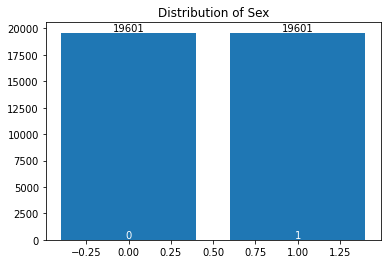

In [352]:
uniques, counts = np.unique(pd.DataFrame(y_train), return_counts=True)
plt.bar(uniques, counts)
for i in range(len(uniques)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
    plt.text(i, i, str(i), ha='center', va='bottom', color = "white")
plt.title("Distribution of Sex")

In [290]:
# # Reshaping for model
# X_train = tf.reshape(X_train, (19601, 1000, 12,1))
# X_test = tf.reshape(X_test, (2198, 1000, 12,1))

### Making the model

In [309]:
tf.debugging.disable_traceback_filtering
# Random Seed
tf.random.set_seed(13)

# Creating the model

ecg_sex_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 10, kernel_size = 7, strides = 2, padding = "valid", activation = 'relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),
    tf.keras.layers.Conv1D(filters = 25, kernel_size = 4, strides = 1, padding = "valid", activation = 'relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(25, activation= 'relu'),
    tf.keras.layers.Dense(2, activation= 'sigmoid')
])


# Compiling the model

ecg_sex_model.compile(loss = tf.keras.losses.binary_crossentropy,
                      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                      metrics = ['accuracy'])

# Learning rate scheduler




# Fitting the model

history = ecg_sex_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
613/613 [==============================] - 8s 11ms/step - loss: 0.6559 - accuracy: 0.6192 - val_loss: 0.6219 - val_accuracy: 0.6970
Epoch 2/10
613/613 [==============================] - 7s 11ms/step - loss: 0.5681 - accuracy: 0.7396 - val_loss: 0.5490 - val_accuracy: 0.7288
Epoch 3/10
613/613 [==============================] - 7s 12ms/step - loss: 0.4941 - accuracy: 0.7678 - val_loss: 0.5414 - val_accuracy: 0.7420
Epoch 4/10
613/613 [==============================] - 7s 11ms/step - loss: 0.4358 - accuracy: 0.7980 - val_loss: 0.5551 - val_accuracy: 0.7407
Epoch 5/10
613/613 [==============================] - 7s 11ms/step - loss: 0.3934 - accuracy: 0.8218 - val_loss: 0.5337 - val_accuracy: 0.7343
Epoch 6/10
613/613 [==============================] - 7s 12ms/step - loss: 0.3424 - accuracy: 0.8474 - val_loss: 0.5707 - val_accuracy: 0.7398
Epoch 7/10
613/613 [==============================] - 7s 12ms/step - loss: 0.2950 - accuracy: 0.8710 - val_loss: 0.6212 - val_accuracy: 0.7311

In [314]:
tf.debugging.disable_traceback_filtering
# Random Seed
tf.random.set_seed(13)

# Creating the model

ecg_sex_model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 7, strides = 3, padding = "valid", activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),
    tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "valid", activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(15, activation= 'relu'),
    tf.keras.layers.Dense(2, activation= 'sigmoid')
])


# Compiling the model

ecg_sex_model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0015),
                      metrics = ['accuracy'])

# Learning rate scheduler




# Fitting the model

history_2 = ecg_sex_model_2.fit(X_train, y_train, epochs = 8, validation_data = (X_test, y_test))

Epoch 1/8
613/613 [==============================] - 9s 13ms/step - loss: 0.6158 - accuracy: 0.6758 - val_loss: 0.5960 - val_accuracy: 0.6920
Epoch 2/8
613/613 [==============================] - 7s 12ms/step - loss: 0.4895 - accuracy: 0.7730 - val_loss: 0.4970 - val_accuracy: 0.7548
Epoch 3/8
613/613 [==============================] - 7s 12ms/step - loss: 0.4341 - accuracy: 0.8012 - val_loss: 0.5180 - val_accuracy: 0.7552
Epoch 4/8
613/613 [==============================] - 8s 12ms/step - loss: 0.3772 - accuracy: 0.8278 - val_loss: 0.5665 - val_accuracy: 0.7525
Epoch 5/8
613/613 [==============================] - 7s 12ms/step - loss: 0.3193 - accuracy: 0.8607 - val_loss: 0.5743 - val_accuracy: 0.7361
Epoch 6/8
613/613 [==============================] - 7s 12ms/step - loss: 0.2674 - accuracy: 0.8856 - val_loss: 0.6567 - val_accuracy: 0.7502
Epoch 7/8
613/613 [==============================] - 7s 12ms/step - loss: 0.2179 - accuracy: 0.9069 - val_loss: 0.7387 - val_accuracy: 0.7580
Epoch 

In [319]:
tf.debugging.disable_traceback_filtering
# Random Seed
tf.random.set_seed(13)

# Creating the model

ecg_sex_model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 7, strides = 4, padding = "valid", activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=4, strides = 1, padding = "valid"),
    tf.keras.layers.Conv1D(filters = 64, kernel_size = 6, strides = 3, padding = "valid", activation = 'relu'),
    tf.keras.layers.MaxPool1D(pool_size=4, strides = 1, padding = "valid"),
    tf.keras.layers.Conv1D(filters = 96, kernel_size = 4, strides = 2, padding = "valid", activation = 'relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),
    tf.keras.layers.Dense(25, activation= 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation= 'sigmoid')
])


# Compiling the model

ecg_sex_model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0015),
                      metrics = ['accuracy'])

# Learning rate scheduler




# Fitting the model

history_3 = ecg_sex_model_3.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
613/613 [==============================] - 8s 12ms/step - loss: 0.5416 - accuracy: 0.7270 - val_loss: 0.5577 - val_accuracy: 0.7320
Epoch 2/10
613/613 [==============================] - 7s 11ms/step - loss: 0.4591 - accuracy: 0.7866 - val_loss: 0.4690 - val_accuracy: 0.7753
Epoch 3/10
613/613 [==============================] - 7s 12ms/step - loss: 0.4328 - accuracy: 0.8015 - val_loss: 0.4789 - val_accuracy: 0.7812
Epoch 4/10
613/613 [==============================] - 7s 12ms/step - loss: 0.4142 - accuracy: 0.8107 - val_loss: 0.4995 - val_accuracy: 0.7648
Epoch 5/10
613/613 [==============================] - 7s 12ms/step - loss: 0.4006 - accuracy: 0.8208 - val_loss: 0.4574 - val_accuracy: 0.7843
Epoch 6/10
613/613 [==============================] - 7s 12ms/step - loss: 0.3900 - accuracy: 0.8264 - val_loss: 0.4526 - val_accuracy: 0.7934
Epoch 7/10
613/613 [==============================] - 8s 13ms/step - loss: 0.3809 - accuracy: 0.8315 - val_loss: 0.4683 - val_accuracy: 0.8030

In [354]:
tf.debugging.disable_traceback_filtering
# Random Seed
tf.random.set_seed(13)

# Creating the model

ecg_sex_model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 7, strides = 4, padding = "valid", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=4, strides = 1, padding = "valid"),

    tf.keras.layers.Conv1D(filters = 48, kernel_size = 6, strides = 3, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=3, strides = 1, padding = "valid"),
    tf.keras.layers.Dropout(0.2, seed = 13),

    tf.keras.layers.Conv1D(filters = 64, kernel_size = 4, strides = 2, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),

    tf.keras.layers.Conv1D(filters = 96, kernel_size = 3, strides = 1, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),
    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dropout(0.2, seed = 13),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(2, activation= 'sigmoid')
])


# Compiling the model

ecg_sex_model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                      metrics = ['accuracy'])

# Learning rate scheduler
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01,patience = 4, baseline= 0.75)



# Fitting the model

history_4 = ecg_sex_model_4.fit(X_train, y_train, epochs = 12, validation_data = (X_test, y_test), callbacks = early_stopper)

Epoch 1/12
613/613 [==============================] - 12s 17ms/step - loss: 0.5351 - accuracy: 0.7424 - val_loss: 0.5353 - val_accuracy: 0.7648
Epoch 2/12
613/613 [==============================] - 11s 18ms/step - loss: 0.4584 - accuracy: 0.7898 - val_loss: 0.4559 - val_accuracy: 0.7875
Epoch 3/12
613/613 [==============================] - 11s 18ms/step - loss: 0.4313 - accuracy: 0.8077 - val_loss: 0.4572 - val_accuracy: 0.7975
Epoch 4/12
613/613 [==============================] - 11s 18ms/step - loss: 0.4115 - accuracy: 0.8153 - val_loss: 0.4940 - val_accuracy: 0.7766
Epoch 5/12
613/613 [==============================] - 11s 18ms/step - loss: 0.4022 - accuracy: 0.8210 - val_loss: 0.4547 - val_accuracy: 0.7925
Epoch 6/12
613/613 [==============================] - 11s 18ms/step - loss: 0.3923 - accuracy: 0.8257 - val_loss: 0.4661 - val_accuracy: 0.7925
Epoch 7/12
613/613 [==============================] - 12s 19ms/step - loss: 0.3759 - accuracy: 0.8349 - val_loss: 0.4746 - val_accuracy:

In [362]:
tf.debugging.disable_traceback_filtering
# Random Seed
tf.random.set_seed(13)

# Creating the model

ecg_sex_model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32, kernel_size = 8, strides = 4, padding = "valid", activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=4, strides = 1, padding = "valid"),

    tf.keras.layers.Conv1D(filters = 48, kernel_size = 7, strides = 3, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),
    tf.keras.layers.Dropout(0.2, seed = 13),

    tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, strides = 2, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),

    tf.keras.layers.Conv1D(filters = 96, kernel_size = 4, strides = 1, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),

    tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "valid", activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=2, strides = 1, padding = "valid"),


    tf.keras.layers.Dense(64, activation= 'relu', kernel_regularizer='l1'),
    tf.keras.layers.Dropout(0.2, seed = 13),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(2, activation= 'sigmoid')
])


# Compiling the model

ecg_sex_model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                      optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0009),
                      metrics = ['accuracy'])

# Learning rate scheduler
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta= 0.01,patience = 4, baseline= 0.75)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: (0.0008) * 10**(epoch/20))



# Fitting the model

history_5 = ecg_sex_model_5.fit(X_train, y_train, epochs = 12, validation_data = (X_test, y_test), callbacks = (early_stopper))

Epoch 1/12
613/613 [==============================] - 18s 27ms/step - loss: 1.6733 - accuracy: 0.7541 - val_loss: 0.5410 - val_accuracy: 0.7707
Epoch 2/12
613/613 [==============================] - 14s 23ms/step - loss: 0.4805 - accuracy: 0.7948 - val_loss: 0.4815 - val_accuracy: 0.7898
Epoch 3/12
613/613 [==============================] - 15s 25ms/step - loss: 0.4501 - accuracy: 0.8112 - val_loss: 0.4726 - val_accuracy: 0.8053
Epoch 4/12
613/613 [==============================] - 14s 23ms/step - loss: 0.4294 - accuracy: 0.8157 - val_loss: 0.5142 - val_accuracy: 0.7807
Epoch 5/12
613/613 [==============================] - 15s 24ms/step - loss: 0.4209 - accuracy: 0.8223 - val_loss: 0.4462 - val_accuracy: 0.8053
Epoch 6/12
613/613 [==============================] - 14s 24ms/step - loss: 0.4054 - accuracy: 0.8299 - val_loss: 0.4717 - val_accuracy: 0.8066
Epoch 7/12
613/613 [==============================] - 15s 25ms/step - loss: 0.3964 - accuracy: 0.8341 - val_loss: 0.4961 - val_accuracy: